# Teletype Example

This notebook outlines a method you can use to produce an ASCII art image that can be printed on a Teletype machione

[Install and activate a virtual environment](https://packaging.python.org/en/latest/guides/installing-using-pip-and-virtual-environments/)

```
python3 -m venv .venv
source .venv/bin/activate
which python
.venv/bin/python
```

Install requirements with pip, if you haven't cloned the repo you can use curl to download the `requirements.txt` file

```
curl https://raw.githubusercontent.com/hevansDev/ascii-booth/main/Workshop/examples/camera/requirements.txt -o requirements.txt
python3 -m pip install -r requirements.txt
```

In [12]:
from PIL import Image, ImageDraw, ImageFont


In [13]:
# Update path to your own image, both pngs and jpgs will work
startImage = Image.open("../../images/kermit.jpg")

In [34]:
characters = "LTJ7FI31Z5Y2ESP694VOGUAKXH8RDB0MNWQ"  # This string must only contain supported Teletype characters
#characters = ".-':_,^=;><+!rc*/z?sLTv)J7(|Fi{C}fI31tlu[neoZ5Yxjya]2ESwqkP6h9d4VpOGbUAKXHm8RD#$Bg0MNWQ%&@"[::-1]
# Try some of the following characters `.-':_,^=;><+!rc*/z?sLTv)J7(|Fi{C}fI31tlu[neoZ5Yxjya]2ESwqkP6h9d4VpOGbUAKXHm8RD#$Bg0MNWQ%&@

pixelWidth = 80  # 80 columns wide is likely a good with but you made need to change this
pixelHeight = 80  # How many characters tall the resulting image will be


def greyscale_to_index(num):
    return int(num / 255 * (len(characters) - 1))


def image_to_ascii(img):
    greyImage = img.convert("L")
    resizedImage = greyImage.resize((80, 70), resample=Image.Resampling.BILINEAR)
    pixels = resizedImage.load()
    ascii = ""
    for y in range(0, resizedImage.height):
        for x in range(0, resizedImage.width):
            pixel = pixels[x, y]
            i = greyscale_to_index(pixel)
            ascii += str(characters[i])
        ascii += "\n"
    return ascii


resized_image = startImage.resize((pixelWidth, pixelHeight), Image.Resampling.NEAREST)
ascii_picture = image_to_ascii(resized_image)

print(ascii_picture)

QQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQ
QQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQWWWQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQ
QQQQQQQQQQQQQQQQQQQQQQQQQQQQQWWWQWWWQQWWQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQ
QQQQQQQQQQQQQQQQQQQQQQQQQQQQWWWWNNMNNQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQ
QQQQQQQQQQQQQQQQQQQQQQQQQQQQWWM000B0MNMWWQQQQWQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQ
QQQQQQQQQQQQQQQQQQQQQQQQQWQWW00DNNMMNMNNWWQWWWWWWWWWQQQQQQQQQQQQQQQQQQQQQQQQQQQQ
QQQQQQQQQQQQQQQQQQQQQQQQQQQWM00M31IO8DNWNWNNWWWWWWWWQQQQQQQQQQQQQQQQQQQQQQQQQQQQ
QQQQQQQQQQQQQQQQQQQQQQQWQWWMNNM3TLL3ZZ0WWMKX00MMNWWWQQWWWWQQQQQQQQQQQQQQQQQQQQQQ
QQQQQQQQQQQQQQQQQQQQQQWWWWW0NWALJL1NWWMWMBUGUAGXBBWWWWWWWWQWQQQQQQQQQQQQQQQQQQQQ
QQQQQQQQQQQQQQQQQQQQQQWWWWNMNKJ29EHWWWBRHGGUUAOGGORMMNNNNWQWQQQQQQQQQQQQQQQQQQQQ
QQQQQQQQQQQQQQQQQQQQQQWWWWNNNGEDWNWWNBKUUOGUUUOGV4KRD0MM0MNWQQQQQQQQQQQQQQQQQQQQ
QQQQQQQQQQQQQQQQQQQWWWWNWR8NNNBNWWMR8AGOGGUGGGGGG48RBNNNNMMNWWQQQQQQQQQQQQQQQQQQ
QQQQQQQQQQQQQQQQQWWWWWNKXUGM

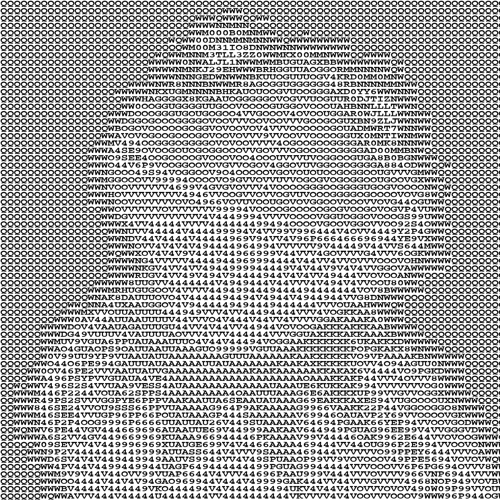

In [39]:
img = Image.new(
    "L", (13 * pixelWidth, 17 * pixelHeight), 255
)  # Blank canvas to draw art onto
draw = ImageDraw.Draw(img)
font = ImageFont.truetype("../../courier.ttf", 24)
draw.text((0, 0), ascii_picture, 0, font=font)
display(img.resize((500, 500)))